In [1]:
import json
import pandas as pd
from textblob import TextBlob
import collections

In [2]:
jstrs = open("./yelp_dataset/yelp_academic_dataset_business.json", encoding='utf-8').readlines()
jdata = []
for s in jstrs:
    jdata.append(json.loads(s))
bdf = pd.DataFrame.from_records(jdata)
jstrs = open("./yelp_dataset/yelp_academic_dataset_tip.json", encoding='utf-8').readlines()
jdata = []
for s in jstrs:
    jdata.append(json.loads(s))
tdf = pd.DataFrame.from_records(jdata)

In [3]:
df = pd.merge(bdf, tdf, on='business_id')

In [4]:
df['sentiment'] = df[['text']].applymap(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
df = df[df['categories'].str.find('Restaurants')!=-1]

In [24]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count,sentiment
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",bgdTaNn0sGiUfIRrH5GEjg,Good beers. Bad bartender. Stay away from Brian.,2019-06-07 22:24:44,0,5.551115e-17
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",nzj6O3Z9H-rTgucdvblOUA,I enjoy this location. Great beers. Great serv...,2019-03-06 22:53:59,0,6.666667e-01
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",XyVyTIkPm9Nqz5VZ9nYX9A,Live music every week! Beer menus not yet prin...,2017-09-12 01:40:51,0,2.130682e-01
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",Mp27LHWQy_RlbU56HJ5eHg,Good food. Good crowd. The ranch taste very si...,2017-10-14 02:36:02,0,3.500000e-01
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",XyVyTIkPm9Nqz5VZ9nYX9A,The newest Oskar Blues opens this coming Monda...,2017-09-09 04:42:34,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162114,ngmLL5Y5OT-bYHKU0kKrYA,Zora Grille,1370 E Altamonte Dr,Altamonte Springs,FL,32701,28.663047,-81.346728,4.5,82,0,"{'RestaurantsReservations': 'True', 'OutdoorSe...","Restaurants, Middle Eastern, Mediterranean, Pe...","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",o9zPD1AXgvz9AU3oW8ktJg,The shish kabab is the best. Make sure to try ...,2015-07-10 00:39:00,0,7.500000e-01
1162115,ngmLL5Y5OT-bYHKU0kKrYA,Zora Grille,1370 E Altamonte Dr,Altamonte Springs,FL,32701,28.663047,-81.346728,4.5,82,0,"{'RestaurantsReservations': 'True', 'OutdoorSe...","Restaurants, Middle Eastern, Mediterranean, Pe...","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",SOfAvE-pfMYhLxKt8lNIRA,Excellent Mediterranean food! Just like in Bo...,2016-04-03 00:04:31,0,1.000000e+00
1162116,ngmLL5Y5OT-bYHKU0kKrYA,Zora Grille,1370 E Altamonte Dr,Altamonte Springs,FL,32701,28.663047,-81.346728,4.5,82,0,"{'RestaurantsReservations': 'True', 'OutdoorSe...","Restaurants, Middle Eastern, Mediterranean, Pe...","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",fB1b3BCcj2CGNQ5PF4D3Sw,Exceptional taste from real charcoal. We had t...,2015-09-12 23:38:14,0,4.583333e-01
1162117,ngmLL5Y5OT-bYHKU0kKrYA,Zora Grille,1370 E Altamonte Dr,Altamonte Springs,FL,32701,28.663047,-81.346728,4.5,82,0,"{'RestaurantsReservations': 'True', 'OutdoorSe...","Restaurants, Middle Eastern, Mediterranean, Pe...","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",huT88nmFbZYs5nlKEqsazA,Great food!!!,2016-04-03 00:05:10,0,1.000000e+00


In [6]:
ave_sentiment, ave_stars = df['sentiment'].mean(), df['stars'].mean()

In [8]:
print(ave_sentiment, ave_stars)

0.30447438942481353 3.7192276045155506


In [11]:
((ave_sentiment+1)*2)+1

3.6089487788496273

In [79]:
st = ['CO','OR','FL','GA','OH','TX','MA','WA']

In [80]:
state_ss = []
for s in st:
    state_ss.append((s, df[df['state']==s]['sentiment'].mean(), df[df['state']==s]['stars'].mean()))
    print(state_ss[-1])

('CO', 0.3462301354825549, 3.76864990877762)
('OR', 0.3144303213495039, 3.823561975384932)
('FL', 0.3314675773201205, 3.7625546569352664)
('GA', 0.3031194462521561, 3.660648919210182)
('OH', 0.31123593070863687, 3.683101898436976)
('TX', 0.2896795896577381, 3.7776609873369176)
('MA', 0.29567420642086933, 3.6483021552794614)
('WA', 0.3550184366724675, 3.619757453259222)


In [81]:
import plotly.graph_objects as go
import plotly

In [82]:
fig = go.Figure(data=go.Choropleth(
    locations = st, # Spatial coordinates
    z = [ss[1] for ss in state_ss], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sentiment",
))

fig.update_layout(
    title_text = 'Average Sentiment of Restaurant Reviews by State',
    geo_scope='usa', # limite map scope to USA
)

plotly.offline.plot(fig, filename='map.html')

'map.html'

In [33]:
sentty = df[df['review_count']>50].groupby('business_id')['sentiment'].mean()

In [34]:
starry = df[df['review_count']>50].groupby('business_id')['stars'].mean()

In [27]:
starry

business_id
--164t1nclzzmca7eDiJMw    4.0
--6COJIAjkQwSUZci_4PJQ    4.0
--Q3mAcX9t63f7Xcbn7LVA    4.5
--UNNdnHRhsyFUbDgumdtQ    4.5
--bbZa1KPYSmW0X4o3TUQw    4.0
                         ... 
zzWxfdbWOnPzP5CxiZ0TvQ    3.0
zzcdycb7S42VnnZkwE4yNA    2.0
zzin1d1oHi81GuI0ufo1VA    3.5
zzlkjDG9Rv8Jn-vSolMgyw    3.5
zzpmoTVq4yn86U7ArHyFBQ    4.0
Name: stars, Length: 40451, dtype: float64

In [28]:
2*sentty + 3

business_id
--164t1nclzzmca7eDiJMw    3.056642
--6COJIAjkQwSUZci_4PJQ    3.857297
--Q3mAcX9t63f7Xcbn7LVA    4.523611
--UNNdnHRhsyFUbDgumdtQ    3.508540
--bbZa1KPYSmW0X4o3TUQw    4.833333
                            ...   
zzWxfdbWOnPzP5CxiZ0TvQ    3.500000
zzcdycb7S42VnnZkwE4yNA    2.756667
zzin1d1oHi81GuI0ufo1VA    3.707461
zzlkjDG9Rv8Jn-vSolMgyw    3.798690
zzpmoTVq4yn86U7ArHyFBQ    5.000000
Name: sentiment, Length: 40451, dtype: float64

In [22]:
import matplotlib.pyplot as plt

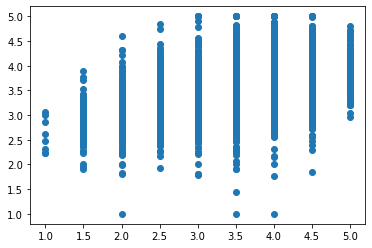

In [35]:
plt.scatter(starry, 2*sentty+3)

In [36]:
from apyori import apriori
import re

In [38]:
bdf['is_restaurant'] = [True if d != -1 else False for d in bdf['categories'].str.find('Restaurants')]

In [44]:
cuis = ['American','Chinese','Indian','Italian','Korean','Thai']
for c in cuis:
    bdf[c] = [True if d != -1 else False for d in bdf['categories'].str.find(c)]

In [83]:
for c in cuis:
    df[c] = [True if d != -1 else False for d in df['categories'].str.find(c)]

In [86]:
for c in cuis:
    cuis_ss = []
    for s in st:
        cuis_ss.append((s, df[(df['state']==s)&(df[c])]['sentiment'].mean(), df[(df['state']==s)&(df[c])]['stars'].mean()))
    fig = go.Figure(data=go.Choropleth(
        locations = st, # Spatial coordinates
        z = [ss[1] for ss in cuis_ss], # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = "Sentiment",
    ))

    fig.update_layout(
        title_text = 'Average Sentiment of '+c+' Restaurant Reviews by State',
        geo_scope='usa', # limite map scope to USA
    )

    plotly.offline.plot(fig, filename=c+' map.html')

In [68]:
bdf['categories'].remove('Restaurants')

AttributeError: 'numpy.ndarray' object has no attribute 'remove'

In [73]:
for c in cuis[1:]:
    cats = bdf[(bdf['is_restaurant'])&(bdf[c])]['categories'].dropna()
    l = [re.findall('[a-zA-z]+', s) for s in cats]
    rules = list(apriori(l, min_support = .1, min_confidence = .7, min_lift = 1, min_length = 1))
    print('Assocation Rule applied on '+c+' Restaurants')
    print([rules[i][2] for i in range(len(rules))])
    print()

Assocation Rule applied on Chinese Restaurants
[[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Chinese'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Restaurants'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Asian'}), items_add=frozenset({'Chinese'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Asian'}), items_add=frozenset({'Fusion'}), confidence=0.9767441860465116, lift=6.142857142857142), OrderedStatistic(items_base=frozenset({'Fusion'}), items_add=frozenset({'Asian'}), confidence=1.0, lift=6.142857142857142)], [OrderedStatistic(items_base=frozenset({'Asian'}), items_add=frozenset({'Restaurants'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Food'}), items_add=frozenset({'Chinese'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Fusion'}), items_add=frozenset({'Chinese'}), confidence=1.0, lift=1.0)], [OrderedStatistic(i